In [1]:
from datasets import load_metric

metric = load_metric('bleu', 'rouge')

# bleu = evaluate.load("bleu")
# results = metric.compute(predictions=predictions, references=references)
# print(results)

In [2]:
import evaluate
predictions = ["hello there general kenobi", "foo bar foobar"]
references = [ ["hello there general kenobi", "hello there !"],
    ["foo bar foobar"]]
bleu = evaluate.load("bleu")
results = bleu.compute(predictions=predictions, references=references)
print(results['bleu'])

2022-06-26 15:31:16.274777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 15:31:16.345902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-26 15:31:16.345926: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-26 15:31:16.347144: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

1.0


In [3]:
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

In [4]:
## Load webis dataset 
import pandas as pd 
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, Dataset

webis_train = "https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv"
webis_test = "https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv"
df_train = pd.read_csv(webis_train)
df_test = pd.read_csv(webis_test)

# Filter only importante variables
# df_train = df_train[['postText', 'truthClass']]
# df_test = df_test[['postText', 'truthClass']]


df_train['truthClass'] = pd.factorize(df_train['truthClass'])[0]
df_test['truthClass'] = pd.factorize(df_test['truthClass'])[0]

df_train, df_valid = train_test_split(df_train, test_size = 0.2, random_state = 42, 
                                  stratify = df_train['truthClass'])

webis_total = DatasetDict()

webis_total['train'] = Dataset.from_pandas(df_train)
webis_total['validation'] = Dataset.from_pandas(df_valid)
webis_total['test'] = Dataset.from_pandas(df_test)


## Pegasus loading results

In [5]:
pegasus_test = pd.read_csv('pegasus_clickbait_summarizer/test_pegasus_clickbait_classifier.csv')
pegasus_nonclickbait_test = pd.read_csv('pegasus_clickbait_summarizer/test_pegasus_non_clickbait_classifier.csv')

In [6]:
pegasus_test.head()

,Unnamed: 0,Id,True title,True label,True Clickbait Score,Generated title,Generated Clickbait Score,id_code
0,0,0,Johnny Manziel on Browns' No. 1 pick Myles Gar...,0,0.012975,Johnny Manziel approves of the Cleveland Brown...,0.012970,8.584269e+17
1,1,1,Fabio: California Is a 'Mess' Because of Liber...,0,0.013491,"Fabio: California Is a 'Messy' State, Not a Cr...",0.013667,8.584164e+17
2,2,2,"""He's been huge for us this year, man.""",1,0.398014,"Jimmy Butler wants Rajon Rondo to stay, Dwyane...",0.012945,8.583640e+17
3,3,3,New Bears quarterback Mitchell Trubisky was gr...,0,0.013082,Bears QB Mitchell Trubisky booed in first publ...,0.012940,8.583358e+17
4,4,4,It's not enough to let employees work flexible...,0,0.014002,Why Some Companies Are Offering Paid Maternity...,0.905072,8.583262e+17


In [7]:
"".join(eval(webis_total['test']['targetParagraphs'][0]))

'Johnny Manziel approves of the Cleveland Browns\' top pick in the 2017 NFL draft.When TMZ asked the former first-round pick about Myles Garrett, Manziel said, "He\'ll do wonders for the team.""First No. 1 pick from Texas A&M ever, so I\'m happy for him," he added.Garett was virtually a consensus top-five player in the draft, and the Browns responded by taking the defensive end No. 1 overall. He was one of three first-round picks by Cleveland, along with Jabrill Peppers and David Njoku.Meanwhile, Manziel likely appreciates any team selecting a player from his alma mater.The 24-year-old quarterback is currently a free agent after being released by the Browns in 2016, although he told TMZ is he still planning a comeback.'

In [8]:
article_content

NameError: name 'article_content' is not defined

In [66]:
# sent_tokenize("".join(article_content[:3]))

['Johnny Manziel approves of the Cleveland Browns\' top pick in the 2017 NFL draft.When TMZ asked the former first-round pick about Myles Garrett, Manziel said, "He\'ll do wonders for the team.',
 '""First No.',
 '1 pick from Texas A&M ever, so I\'m happy for him," he added.']

In [5]:
from tqdm import tqdm
from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join((text)[:3])

In [39]:

scores = {
    'bleu' : [],
    'rouge' : [],
}
for i in tqdm(range(len(pegasus_test))):

    article_content = eval(webis_total['test']['targetParagraphs'][i])
    generated_title = pegasus_test.iloc[i]['Generated title']
    original_title = pegasus_test.iloc[i]['True title']
    baseline_score = three_sentence_summary(article_content)

    print(baseline_score)

    scores['bleu'].append(bleu.compute(predictions=[generated_title], references=[article_content]))
    scores['rouge'].append(rouge.compute(predictions=[generated_title], references=[original_title]))

    print(generated_title)
    print(original_title)
    print(scores['bleu'])
    print(scores['rouge'])
    break
    # predictions = [generated_title]
    # references = [article_content]

    # print(predictions)
    # print(references)
    # scores['bleu']
    # scores['bleu_generated'].append(bleu.compute(predictions=[generated_title], references=[article_content]))
    # scores['bleu_original'].append(bleu.compute(predictions=[original_title], references=[article_content]))

    # scores['rouge_generated'].append(rouge.compute(predictions=[generated_title], references=["".join(article_content)]))
    # scores['rouge_original'].append(rouge.compute(predictions=[original_title], references=["".join(article_content)]))

    # print(scores['bleu_generated'])
    # print(scores['bleu_original'])
    # print(scores['rouge_generated'])
    # break
    # if pegasus_test.iloc[i]['truthClass'] == 'clickbait':
    #     pegasus_test.iloc[i]['truthClass'] = 1

  0%|          | 0/98 [00:00<?, ?it/s]

Johnny Manziel approves of the Cleveland Browns' top pick in the 2017 NFL draft.
When TMZ asked the former first-round pick about Myles Garrett, Manziel said, "He'll do wonders for the team."
"First No. 1 pick from Texas A&M ever, so I'm happy for him," he added.
Johnny Manziel approves of the Cleveland Browns' top pick in the 2017 NFL draft
Johnny Manziel on Browns' No. 1 pick Myles Garrett: "He'll do wonders for the team"

🎥:
[{'bleu': 0.9310627797040228, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 0.9310627797040228, 'length_ratio': 0.9333333333333333, 'translation_length': 14, 'reference_length': 15}]
[{'rouge1': AggregateScore(low=Score(precision=0.35714285714285715, recall=0.3125, fmeasure=0.3333333333333333), mid=Score(precision=0.35714285714285715, recall=0.3125, fmeasure=0.3333333333333333), high=Score(precision=0.35714285714285715, recall=0.3125, fmeasure=0.3333333333333333)), 'rouge2': AggregateScore(low=Score(precision=0.07692307692307693, recall=0.06666666666666

In [6]:
def three_sentence_summary(text):
    return "\n".join((text)[:3])

def evaluate_baseline(dataset, metric, selection_fun = three_sentence_summary):
    # summaries = [selection_fun(text) for text in dataset["caption_text"]]
    # summaries = [selection_fun(text) for text in dataset["targetParagraphs"]]
    summaries = []
    references = []
    for i in range(100):
        summaries.append(selection_fun(eval(dataset["targetParagraphs"][i])))
        references.append(dataset['targetTitle'][i])

    print(summaries[0])
    metric.compute(predictions=summaries, references=references)
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    return rouge_dict

# def evaluate_generated(dataset, metric, selection_fun = three_sentence_summary):
def evaluate_generated(dataset, metric):
    summaries = []
    references = []
    for i in range(100):
        summaries.append(selection_fun(eval(dataset["targetParagraphs"][i])))
        references.append(dataset['targetTitle'][i])

    print(summaries[0])
    return metric.compute(predictions=summaries, references=references)

In [14]:
baseline_summaries = []

for item in webis_total["test"][:98]['targetParagraphs']:
    baseline_summaries.append(three_sentence_summary(eval(item)))

baseline_summaries[0]

pegasus_test['baseline'] = baseline_summaries

In [42]:
pegasus_test.head()

,Unnamed: 0,Id,True title,True label,True Clickbait Score,Generated title,Generated Clickbait Score,id_code,baseline
0,0,0,Johnny Manziel on Browns' No. 1 pick Myles Gar...,0,0.012975,Johnny Manziel approves of the Cleveland Brown...,0.012970,8.584269e+17,Johnny Manziel approves of the Cleveland Brown...
1,1,1,Fabio: California Is a 'Mess' Because of Liber...,0,0.013491,"Fabio: California Is a 'Messy' State, Not a Cr...",0.013667,8.584164e+17,"Fabio, the Italian-born male model who has ado..."
2,2,2,"""He's been huge for us this year, man.""",1,0.398014,"Jimmy Butler wants Rajon Rondo to stay, Dwyane...",0.012945,8.583640e+17,CHICAGO -- All-Star swingman Jimmy Butler know...
3,3,3,New Bears quarterback Mitchell Trubisky was gr...,0,0.013082,Bears QB Mitchell Trubisky booed in first publ...,0.012940,8.583358e+17,CHICAGO -- New Bears quarterback Mitchell Trub...
4,4,4,It's not enough to let employees work flexible...,0,0.014002,Why Some Companies Are Offering Paid Maternity...,0.905072,8.583262e+17,"Six months after her baby was born, Amanda San..."


In [7]:
def get_scores(series_title = None,
               series_index = None,
               baseline_title = None,
               set_bar_title = 'Pegasus: Original vs baseline'):
    score = rouge.compute(predictions=series_title[series_index == 1
    ].tolist(), references=baseline_title[series_index == 1
    ].tolist())
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    clickbait_rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    print(clickbait_rouge_dict)

    score = rouge.compute(predictions=series_title[series_index == 0
    ].tolist(), references=baseline_title[series_index == 0
    ].tolist())
    non_clickbait_rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    print(non_clickbait_rouge_dict)

    non_clickbait_values = non_clickbait_rouge_dict.values() #[20, 17.5, 40]
    clickbait_values = clickbait_rouge_dict.values() #[15, 8, 70]
    index = list(non_clickbait_rouge_dict.keys())
    df = pd.DataFrame({'Non-clickbait Values': non_clickbait_values,
                        'Clickbait Values': clickbait_values}, index=index)
    ax = df.plot.bar(rot=0, color={"Non-clickbait Values": "cyan", "Clickbait Values": "red"})
    ax.set_title(set_bar_title,wrap=True)
    # plt.save_fig(set_bar_title + '.png')
    # fig = df.plot()
    fig = ax.get_figure()
    fig.savefig(set_bar_title + '.png')

    return {'clickbait_rouge_dict' : clickbait_rouge_dict, 'non_clickbait_rouge_dict' : non_clickbait_rouge_dict}


### Rouge: Original vs baseline title, separately for non-clickbait vs clickbait

In [8]:
results_original = get_scores(series_title = pegasus_test['True title'],
               series_index = pegasus_test['True label'],
               baseline_title = pegasus_test['baseline'],
               set_bar_title = 'pegasus_clickbait_summarizer/' + 'Pegasus: Original vs baseline')

NameError: name 'pegasus_test' is not defined

### Rouge: Generated vs baseline title, separately for non-clickbait vs clickbait

{'rouge1': 16.16, 'rouge2': 8.58, 'rougeL': 12.54, 'rougeLsum': 14.38}
{'rouge1': 16.27, 'rouge2': 10.26, 'rougeL': 14.81, 'rougeLsum': 15.47}


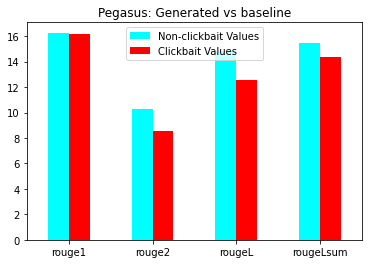

In [17]:
results_generated = get_scores(series_title = pegasus_test['Generated title'],
               series_index = pegasus_test['True label'],
               baseline_title = pegasus_test['baseline'],
               set_bar_title = 'pegasus_clickbait_summarizer/' + 'Pegasus: Generated vs baseline')

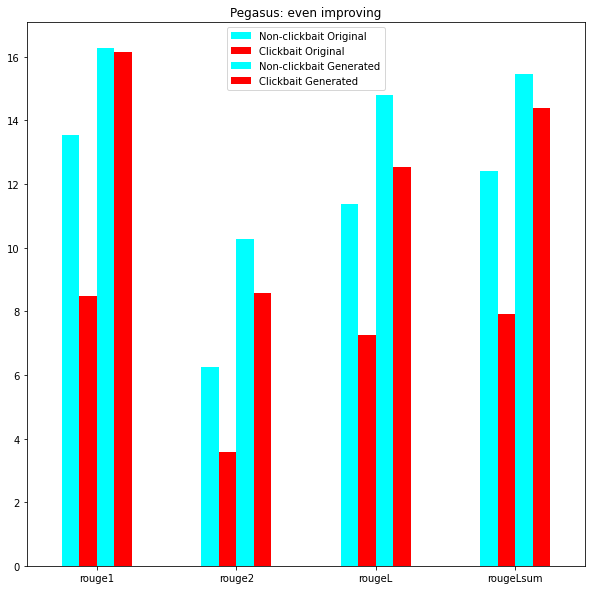

In [18]:
index = list(results_original['non_clickbait_rouge_dict'].keys())

df = pd.DataFrame({'Non-clickbait Original': results_original['non_clickbait_rouge_dict'].values(),
                    'Clickbait Original': results_original['clickbait_rouge_dict'].values(),
                    'Non-clickbait Generated': results_generated['non_clickbait_rouge_dict'].values(),
                    'Clickbait Generated': results_generated['clickbait_rouge_dict'].values()}, index=index)


ax = df.plot.bar(rot=0, color={
                    'Non-clickbait Original': "cyan",
                    'Clickbait Original': "red",
                    'Non-clickbait Generated': "cyan",
                    'Clickbait Generated': "red"},
                    figsize=(10,10))

set_bar_title = 'Pegasus: even improving'                  
ax.set_title(set_bar_title,wrap=True)
# plt.save_fig(set_bar_title + '.png')
# fig = df.plot()
fig = ax.get_figure()
fig.savefig('pegasus_clickbait_summarizer/' + set_bar_title + '.png')

### To add: Generated/Original vs random-3 and another pegasus baseline

# PPLM 

In [9]:
from transformers import AutoModel,AutoTokenizer
from clickbait_classifier import BertClickbaitClassifier
# classifier_model_path = "drive/MyDrive/nlp_lss_data/mpnet_clickbait_classification_maxlen25/checkpoint-1464"
classifier_model_path = "../naacl-2021-fudge-controlled-generation/ckpt/clickbait_classifier/checkpoint-1464/"
device='cuda'
#Loading classifier
classifier_tokenizer = AutoTokenizer.from_pretrained(classifier_model_path, load_best_model_at_end=True)
classifier_model = BertClickbaitClassifier.from_pretrained(classifier_model_path).to(device)


Load pretrained weights from sentence-transformers/all-mpnet-base-v2


In [10]:
def rate_title(input_text, model, tokenizer, device='cuda'):
  # input_text = {
  #                 "postText": input_text['postText'],
  #                 "truthClass" : input_text['truthClass']
  #              }
  tokenized_input = preprocess_function_title_only_classification(input_text,tokenizer=tokenizer)
  # print(tokenized_input.items())
  dict_tokenized_input = {k : torch.tensor([v]).to(device) for k,v in tokenized_input.items() if k != 'labels'}
  predicted_class = float(model(**dict_tokenized_input).logits)
  actual_class = input_text['truthClass']

  # print(predicted_class, actual_class)
  return {'predicted_class' : predicted_class}

#For classification part
def preprocess_function_title_only_classification(examples,tokenizer=None):
    model_inputs = tokenizer(examples['postText'], padding="longest", truncation=True, max_length=25)
      
    model_inputs['labels'] = examples['truthClass']

    return model_inputs


In [27]:
import torch
def get_classifier_results_pplm(original_dataset = None, 
                            pplm_dataset = None,
                            subset=100):

    pplm_results = {
        'id' : [],
        'perturbed_0_clickbait_score' : [],
        'perturbed_1_clickbait_score' : [],
        'perturbed_2_clickbait_score' : [],
        'perturbed_3_clickbait_score' : [],
        'perturbed_4_clickbait_score' : [],
        'unperturbed_clickbait_score' : [],
        'truthClass' : []
    }
    for chosen_index in range(subset):
        # print(chosen_index)


        pplm_results['id'].append(original_dataset['id'][chosen_index])
        #for perturbed_{i}, evaluate with classifier

        for i in range(5):
            chosen_column = 'perturbed_{}'.format(i)
            result = rate_title(input_text = {
                            'postText' : pplm_dataset.iloc[chosen_index][chosen_column], 
                            'truthClass' : original_dataset['truthClass'][chosen_index]
                        },
                    model=classifier_model.to('cuda'),
                    tokenizer=classifier_tokenizer,
                    device='cuda'
                    )

            pplm_results['perturbed_{}_clickbait_score'.format(i)].append(result['predicted_class'])
            
        chosen_column = 'unperturbed'
        result = rate_title(input_text = {
                            'postText' : pplm_dataset.iloc[chosen_index][chosen_column], 
                            'truthClass' : original_dataset['truthClass'][chosen_index]
                        },
                    model=classifier_model.to('cuda'),
                    tokenizer=classifier_tokenizer,
                    device='cuda'
                    )
        pplm_results['unperturbed_clickbait_score'].append(result['predicted_class'])

        pplm_results['truthClass'].append(original_dataset['truthClass'][chosen_index])

    for key in pplm_results.keys():
        pplm_dataset[key] = pd.Series(pplm_results[key])

    return pplm_dataset


In [12]:
df_pplm_test = pd.read_csv('pplm/df_clickbait_test')
df_pplm_test = pplm_get_classifier_results(original_dataset = webis_total['test'], 
                                        pplm_dataset = df_pplm_test,
                                        subset=100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [13]:
df_pplm_test.head()

,original_title,clickbait_title,article_content,perturbed_0,perturbed_1,perturbed_2,perturbed_3,perturbed_4,unperturbed,id,perturbed_0_clickbait_score,perturbed_1_clickbait_score,perturbed_2_clickbait_score,perturbed_3_clickbait_score,perturbed_4_clickbait_score,unperturbed_clickbait_score,truthClass
0,Formerziel said he is impressed with the Clev...,NaN,"[""Johnny Manziel approves of the Cleveland Bro...","Johnny Manziel, a 2012 Super Bowl winner with...","Johnny Manziel said he was ""happy"" for the Cl...",Johnny Manziel has given his approval of the ...,Former Texas A&M quarterback Johnny Manziel h...,"Johnny Manziel, who played for the Cleveland ...",Formerziel said he is impressed with the Clev...,858426904239497216,0.013017,0.013040,0.012961,0.012996,0.013009,0.013062,0
1,The most famous fictional man in America spok...,NaN,"['Fabio, the Italian-born male model who has a...","""Sex and the City"" co-star Fabio says Califor...","He might be the most famous man alive, but Ca...","California is in a ""mess"", one of the country...","A top model has called California ""a mess,"" a...",A well-known American model has called out th...,The most famous fictional man in America spok...,858416350540201984,0.012999,0.196154,0.012962,0.013116,0.013975,0.054737,0
2,The Chicago Bulls lost to the Boston Celtics ...,NaN,"[""CHICAGO -- All-Star swingman Jimmy Butler kn...",The Chicago Bulls' season came to an end on F...,Jimmy Butler and Rajon Rondo both want to sta...,"Jimmy Butler wants to stay in Chicago, Rajon ...",A look at some of the key quotes from the Chi...,Chicago Bulls All-Stars Jimmy Butler and Dwya...,The Chicago Bulls lost to the Boston Celtics ...,858364015260704768,0.013073,0.012991,0.012992,0.029649,0.012973,0.013099,1
3,"The second day of the NFL draft is under way,...",NaN,['CHICAGO -- New Bears quarterback Mitchell Tr...,"The second day of the NFL draft has ended, so...",New Bears quarterback Mitchell Trubisky was g...,NFL draft coverage continues as the 2017 draf...,Here is a round-by-round guide to the 2017 NF...,New Chicago Bears quarterback Mitchell Trubis...,"The second day of the NFL draft is under way,...",858335817693102080,0.738296,0.013003,0.012998,0.013703,0.012995,0.078285,0
4,The company she worked for is offering new fl...,NaN,"['Six months after her baby was born, Amanda S...","Working from home, at least two days a week, ...",As companies continue to look for ways to hel...,"In the latest issue of The New York Times, au...",A new company-sponsored program is making it ...,"When Amanda Sanchez became a mother, she had ...",The company she worked for is offering new fl...,858326196282679296,0.016672,0.013102,0.012963,0.013674,0.013333,0.894544,0


In [14]:
import numpy as np
def find_pplm_max_results(df_pplm):
    pplm_max_results = {
        'clickbait_title_clickbait_score' : [],
        'original_title_clickbait_score' : [],
        'clickbait_title' : [],
        'original_title': [],
        'truthClass' : []
    }
    for row in df_pplm.iterrows():
        perturb_scores = [row[1]['perturbed_0_clickbait_score'], row[1]['perturbed_1_clickbait_score'], row[1]['perturbed_2_clickbait_score'], row[1]['perturbed_3_clickbait_score'], row[1]['perturbed_4_clickbait_score']]
        pplm_max_results['clickbait_title_clickbait_score'].append(max(perturb_scores))
        pplm_max_results['original_title_clickbait_score'].append(row[1]['unperturbed_clickbait_score'])

        pplm_max_results['clickbait_title'].append(row[1]['perturbed_{}'.format(np.argmax(perturb_scores))])
        pplm_max_results['original_title'].append(row[1]['original_title'])

        pplm_max_results['truthClass'].append(row[1]['truthClass'])


    return pplm_max_results


df_pplm_test_max = pd.DataFrame(find_pplm_max_results(df_pplm_test))

In [15]:
df_pplm_test_max.head()

,clickbait_title_clickbait_score,original_title_clickbait_score,clickbait_title,original_title,truthClass
0,0.013040,0.013062,"Johnny Manziel said he was ""happy"" for the Cl...",Formerziel said he is impressed with the Clev...,0
1,0.196154,0.054737,"He might be the most famous man alive, but Ca...",The most famous fictional man in America spok...,0
2,0.029649,0.013099,A look at some of the key quotes from the Chi...,The Chicago Bulls lost to the Boston Celtics ...,1
3,0.738296,0.078285,"The second day of the NFL draft has ended, so...","The second day of the NFL draft is under way,...",0
4,0.016672,0.894544,"Working from home, at least two days a week, ...",The company she worked for is offering new fl...,0


In [16]:
baseline_summaries_pplm = []

for item in webis_total["test"][:100]['targetParagraphs']:
    baseline_summaries_pplm.append(three_sentence_summary(eval(item)))

baseline_summaries_pplm[0]

df_pplm_test_max['baseline'] = baseline_summaries_pplm

{'rouge1': 17.88, 'rouge2': 6.56, 'rougeL': 13.13, 'rougeLsum': 15.45}
{'rouge1': 17.18, 'rouge2': 5.96, 'rougeL': 12.27, 'rougeLsum': 14.87}


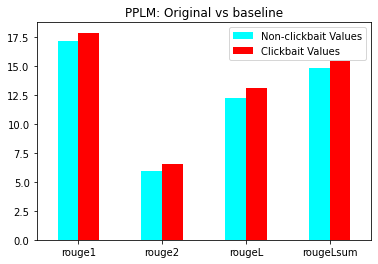

In [17]:
results_original = get_scores(series_title = df_pplm_test_max['original_title'],
               series_index = df_pplm_test_max['truthClass'],
               baseline_title = df_pplm_test_max['baseline'],
               set_bar_title = 'pplm/' + 'PPLM: Original vs baseline')

{'rouge1': 15.44, 'rouge2': 4.02, 'rougeL': 10.52, 'rougeLsum': 12.69}
{'rouge1': 14.74, 'rouge2': 4.55, 'rougeL': 10.58, 'rougeLsum': 12.34}


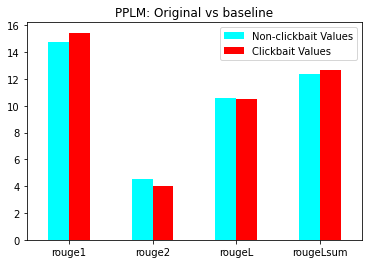

In [18]:
results_generated = get_scores(series_title = df_pplm_test_max['clickbait_title'],
               series_index = df_pplm_test_max['truthClass'],
               baseline_title = df_pplm_test_max['baseline'],
               set_bar_title = 'pplm/' + 'PPLM: Original vs baseline')

In [19]:
results_original

{'clickbait_rouge_dict': {'rouge1': 17.88,
  'rouge2': 6.56,
  'rougeL': 13.13,
  'rougeLsum': 15.45},
 'non_clickbait_rouge_dict': {'rouge1': 17.18,
  'rouge2': 5.96,
  'rougeL': 12.27,
  'rougeLsum': 14.87}}

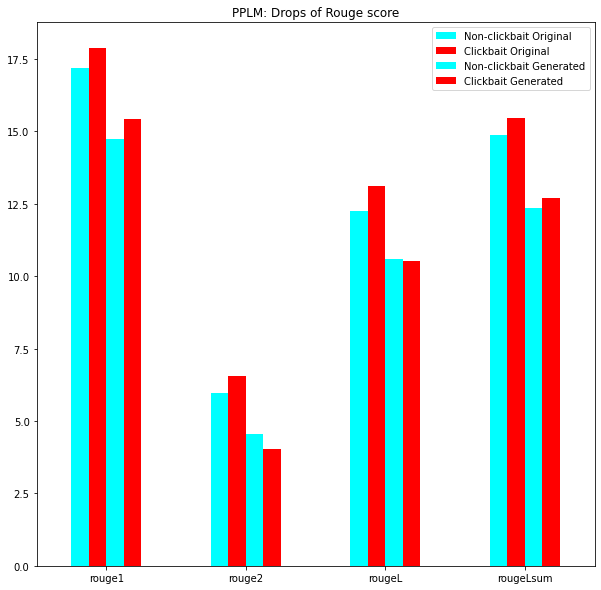

In [20]:
index = list(results_original['non_clickbait_rouge_dict'].keys())

df = pd.DataFrame({'Non-clickbait Original': results_original['non_clickbait_rouge_dict'].values(),
                    'Clickbait Original': results_original['clickbait_rouge_dict'].values(),
                    'Non-clickbait Generated': results_generated['non_clickbait_rouge_dict'].values(),
                    'Clickbait Generated': results_generated['clickbait_rouge_dict'].values()}, index=index)


ax = df.plot.bar(rot=0, color={
                    'Non-clickbait Original': "cyan",
                    'Clickbait Original': "red",
                    'Non-clickbait Generated': "cyan",
                    'Clickbait Generated': "red"},
                    figsize=(10,10))

set_bar_title = 'PPLM: Drops of Rouge score'                  
ax.set_title(set_bar_title,wrap=True)
# plt.save_fig(set_bar_title + '.png')
# fig = df.plot()
fig = ax.get_figure()
fig.savefig('pplm/' + set_bar_title + '.png')

In [21]:
!ls pplm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
df_clickbait_test
df_clickbait_test_class_label_0.0_subset_25.csv
df_clickbait_test_class_label_0.33_subset_25.csv
df_clickbait_test_class_label_0.66_subset_25.csv
df_clickbait_test_class_label_1.0_subset_25.csv
df_clickbait_test_stepsize_0.4.csv
df_clickbait_test_stepsize_0.8.csv
df_clickbait_test_stepsize_10.0.csv
df_clickbait_test_stepsize_1.2.csv
df_clickbait_test_stepsize_1.6.csv
df_clickbait_test_stepsize_20.0.csv
df_clickbait_test_stepsize_2.0.csv
df_clickbait_train.csv
df_clickbait_train_stepsize_0.4.csv
df_clickbait_train_stepsize_0.8.csv
df_clickbait_train_stepsize_1.2.csv
df_clickbait_train_stepsize_1.6.csv
df_clickbait_train_stepsize_2.0.csv
df_clickbait_v

### PPLM with stepsize 0.4,0.8,1.2,1.6,2.0,10.0,20.0
### TODO: Correct this train -> TEST

In [22]:
baseline_summaries_pplm = []

for item in webis_total["train"][:25]['targetParagraphs']:
    baseline_summaries_pplm.append(three_sentence_summary(eval(item)))

baseline_summaries_pplm[0]


'Share this with\nEmail\nFacebook'

Original score for stepsize 0.4
{'rouge1': 17.43, 'rouge2': 4.26, 'rougeL': 11.21, 'rougeLsum': 13.39}
{'rouge1': 18.04, 'rouge2': 7.22, 'rougeL': 13.57, 'rougeLsum': 16.11}
Generated score for stepsize 0.4
{'rouge1': 20.47, 'rouge2': 5.5, 'rougeL': 12.89, 'rougeLsum': 14.95}
{'rouge1': 14.04, 'rouge2': 4.39, 'rougeL': 10.23, 'rougeLsum': 11.9}
Original score for stepsize 0.8
{'rouge1': 17.43, 'rouge2': 4.26, 'rougeL': 11.21, 'rougeLsum': 13.39}
{'rouge1': 18.04, 'rouge2': 7.22, 'rougeL': 13.57, 'rougeLsum': 16.11}
Generated score for stepsize 0.8
{'rouge1': 12.98, 'rouge2': 3.2, 'rougeL': 9.23, 'rougeLsum': 10.87}
{'rouge1': 16.68, 'rouge2': 6.12, 'rougeL': 11.96, 'rougeLsum': 14.47}
Original score for stepsize 1.2
{'rouge1': 17.43, 'rouge2': 4.26, 'rougeL': 11.21, 'rougeLsum': 13.39}
{'rouge1': 18.04, 'rouge2': 7.22, 'rougeL': 13.57, 'rougeLsum': 16.11}
Generated score for stepsize 1.2
{'rouge1': 10.74, 'rouge2': 1.19, 'rougeL': 7.38, 'rougeLsum': 8.61}
{'rouge1': 16.19, 'rouge2': 4.

/home/dsvilarkovic/miniconda3/envs/nlp_lss/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


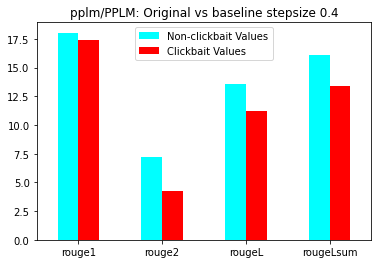

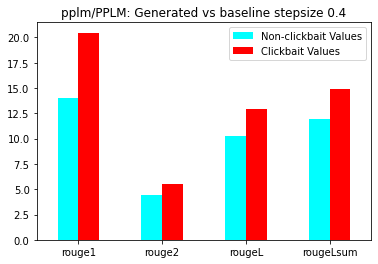

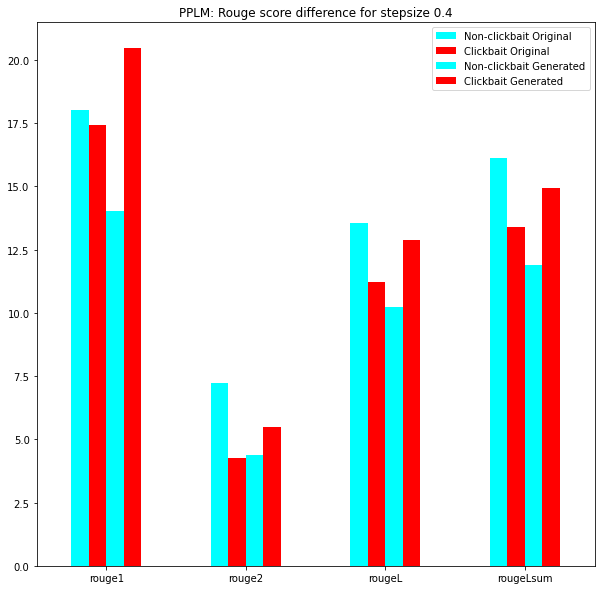

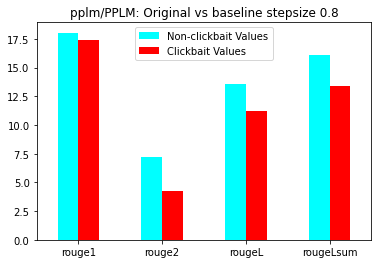

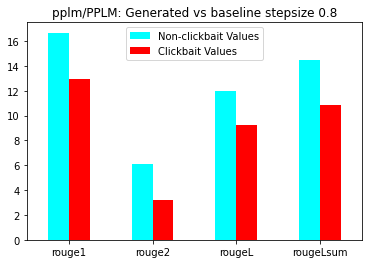

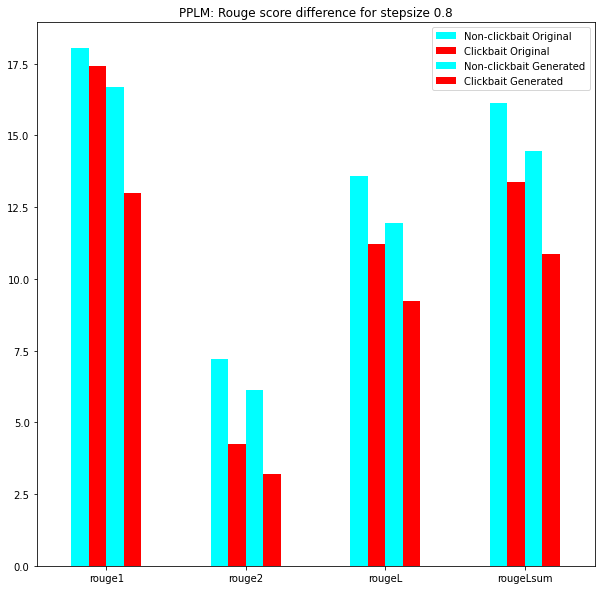

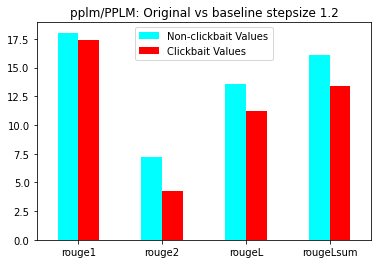

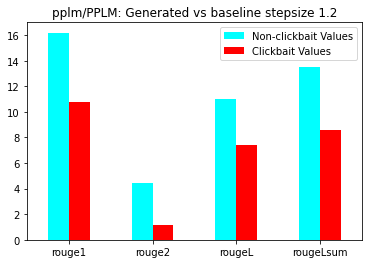

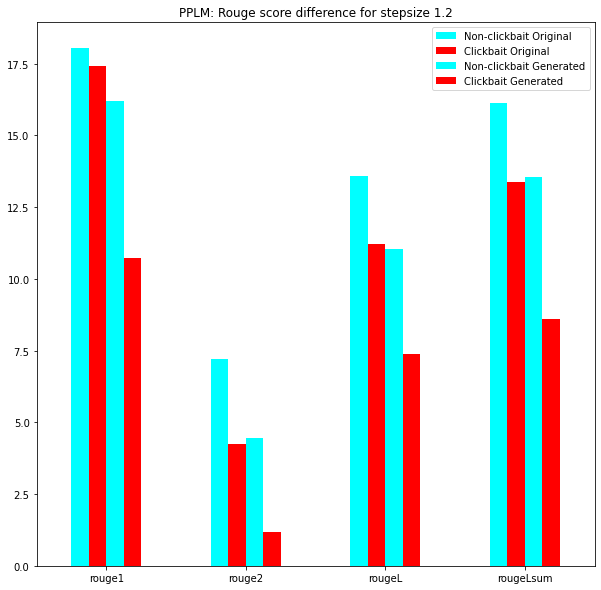

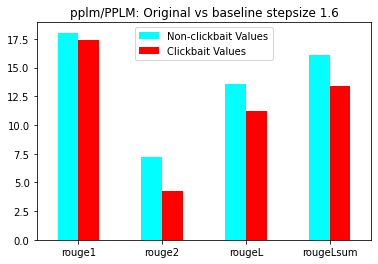

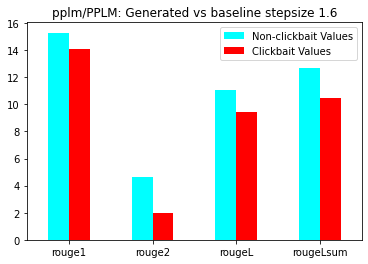

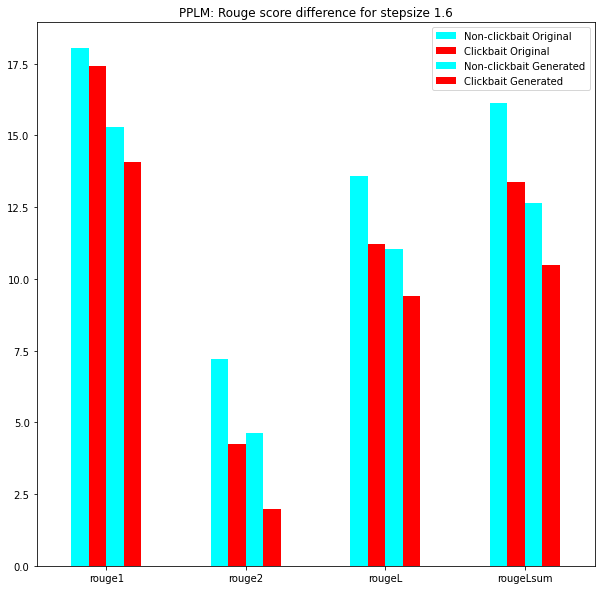

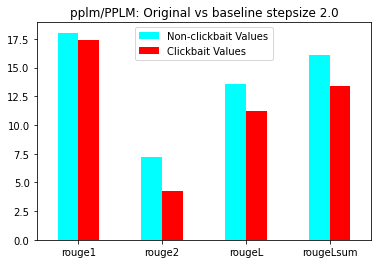

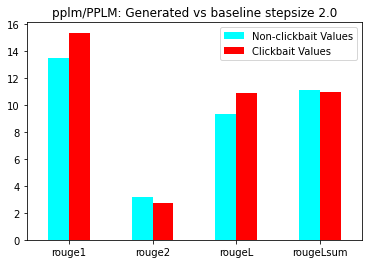

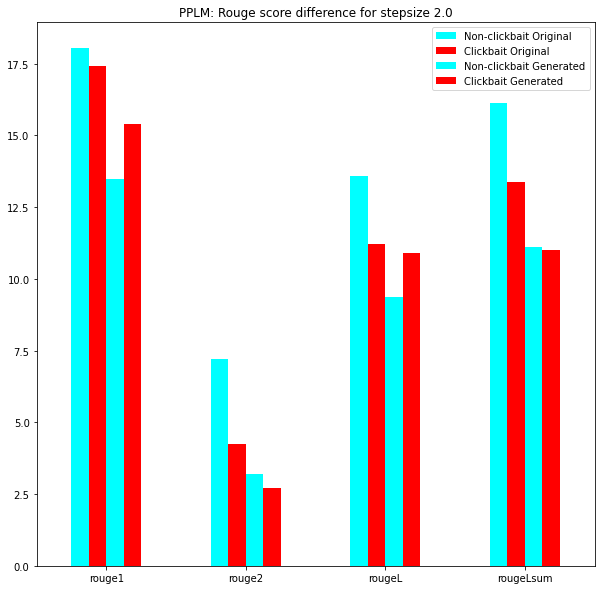

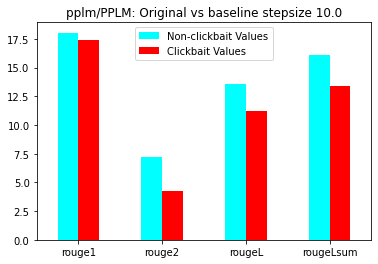

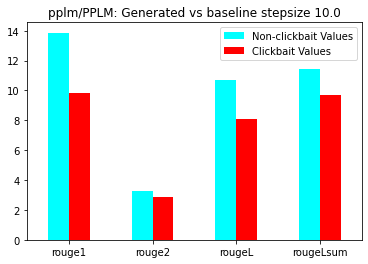

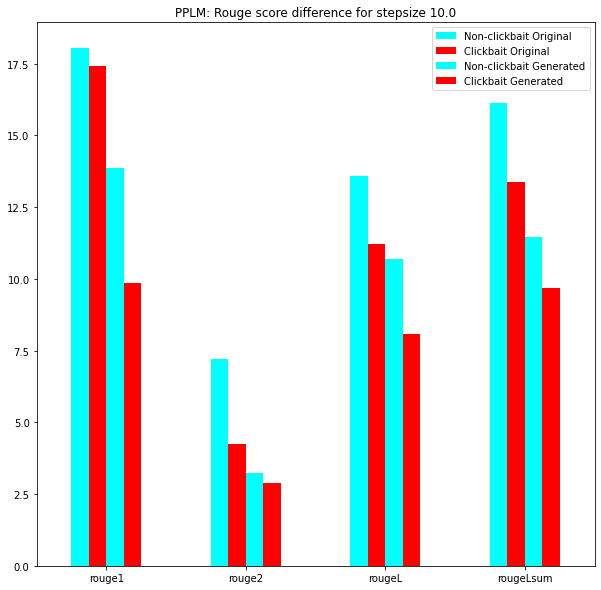

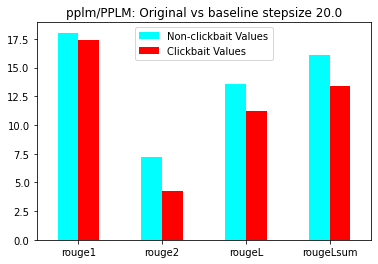

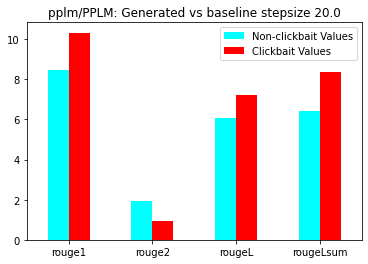

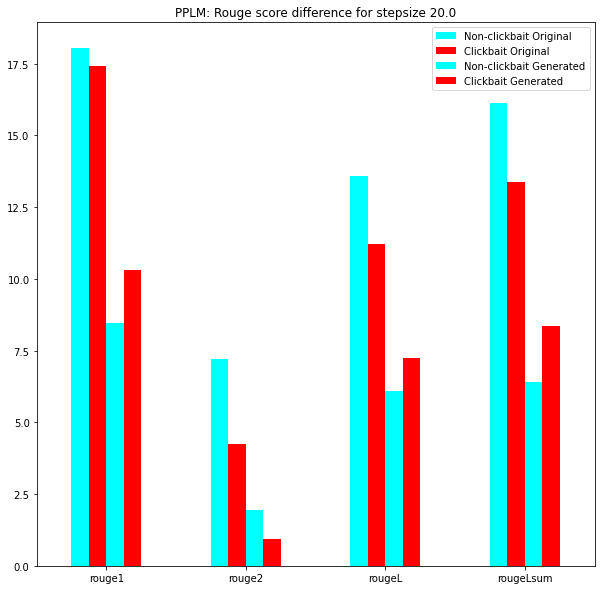

In [126]:
# stepsize_array = [0.4,0.8,1.2,1.6,2.0,10.0,20.0]
stepsize_array = [0.4,0.8,1.2,1.6,2.0,4.0,6.0,8.0,10.0,12.0,15.0,17.0,20.0,25.0,30.0,40.0,50.0]

def add_rouge_items(dictionary_to_add_to, dictionary_items):
    for k,v in dictionary_items.items():
        dictionary_to_add_to[k].append(dictionary_items[k])

    return dictionary_to_add_to

keys_array = ['original_clickbait', 'original_non_clickbait', 'generated_clickbait', 'generated_non_clickbait']

array_rouge_values_all_hyperparams = {key : {
        'rouge1': [],
        'rouge2': [],
        'rougeL': [],
        'rougeLsum' : []
    }for key in keys_array}

for stepsize in stepsize_array:
    df_pplm_test_stepsize = pd.read_csv(f'pplm/df_clickbait_test_stepsize_{stepsize}_subset_25.csv')
    df_pplm_test_stepsize = get_classifier_results_pplm(original_dataset = webis_total['test'], 
                                            pplm_dataset = df_pplm_test_stepsize,
                                            subset=25)


    df_pplm_test_stepsize = pd.DataFrame(find_pplm_max_results(df_pplm_test_stepsize))
    df_pplm_test_stepsize['baseline'] = baseline_summaries_pplm

    print(f'Original score for stepsize {stepsize}')
    results_original = get_scores(series_title = df_pplm_test_stepsize['original_title'],
               series_index = df_pplm_test_stepsize['truthClass'],
               baseline_title = df_pplm_test_stepsize['baseline'],
               set_bar_title = 'pplm/' + f'PPLM: Original vs baseline stepsize {stepsize}')
    print(f'Generated score for stepsize {stepsize}')
    results_generated = get_scores(series_title = df_pplm_test_stepsize['clickbait_title'],
                series_index = df_pplm_test_stepsize['truthClass'],
                baseline_title = df_pplm_test_stepsize['baseline'],
                set_bar_title = 'pplm/' + f'PPLM: Generated vs baseline stepsize {stepsize}')
    
    index = list(results_original['non_clickbait_rouge_dict'].keys())

    df = pd.DataFrame({'Non-clickbait Original': results_original['non_clickbait_rouge_dict'].values(),
                        'Clickbait Original': results_original['clickbait_rouge_dict'].values(),
                        'Non-clickbait Generated': results_generated['non_clickbait_rouge_dict'].values(),
                        'Clickbait Generated': results_generated['clickbait_rouge_dict'].values()}, index=index)


    add_rouge_items(array_rouge_values_all_hyperparams['original_clickbait'], results_original['clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['original_non_clickbait'], results_original['non_clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['generated_clickbait'], results_generated['clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['generated_non_clickbait'], results_generated['non_clickbait_rouge_dict'])
    
    ax = df.plot.bar(rot=0, color={
                        'Non-clickbait Original': "cyan",
                        'Clickbait Original': "red",
                        'Non-clickbait Generated': "cyan",
                        'Clickbait Generated': "red"},
                        figsize=(10,10))

    set_bar_title = f'PPLM: Rouge score difference for stepsize {stepsize}'                  
    ax.set_title(set_bar_title,wrap=True)
    # plt.save_fig(set_bar_title + '.png')
    # fig = df.plot()
    fig = ax.get_figure()
    fig.savefig('pplm/' + set_bar_title + '.png')

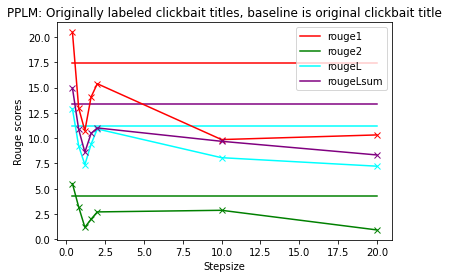

In [127]:
import matplotlib.pyplot as plt

color_plot = {
    'rouge1' : 'red',
    'rouge2' : 'green', 
    'rougeL' : 'cyan', 
    'rougeLsum' : 'purple'
}
for k, v in array_rouge_values_all_hyperparams['original_clickbait'].items():
    plt.plot(stepsize_array, v, '-', label=k, color = color_plot[k])

for k, v in array_rouge_values_all_hyperparams['generated_clickbait'].items():
    plt.plot(stepsize_array, v, 'x-', color = color_plot[k])

title = 'PPLM: Originally labeled clickbait titles, baseline is original clickbait title'
plt.title(title,wrap=True)
plt.xlabel('Stepsize')
plt.ylabel('Rouge scores')
plt.legend()
plt.savefig('pplm/' + title + '.png')
plt.show()

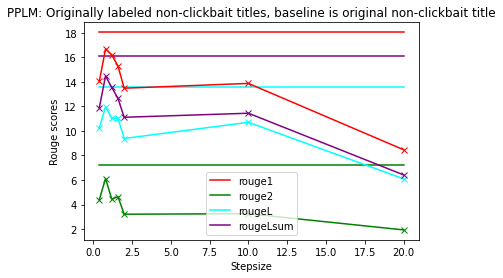

In [128]:
import matplotlib.pyplot as plt

color_plot = {
    'rouge1' : 'red',
    'rouge2' : 'green', 
    'rougeL' : 'cyan', 
    'rougeLsum' : 'purple'
}
for k, v in array_rouge_values_all_hyperparams['original_non_clickbait'].items():
    plt.plot(stepsize_array, v, '-', label=k, color = color_plot[k])
    

for k, v in array_rouge_values_all_hyperparams['generated_non_clickbait'].items():
    plt.plot(stepsize_array, v, 'x-', color = color_plot[k])


title = 'PPLM: Originally labeled non-clickbait titles, baseline is original non-clickbait title'
plt.title(title,wrap=True)
plt.xlabel('Stepsize')
plt.ylabel('Rouge scores')
plt.legend()
plt.savefig('pplm/' + title + '.png')
plt.show()

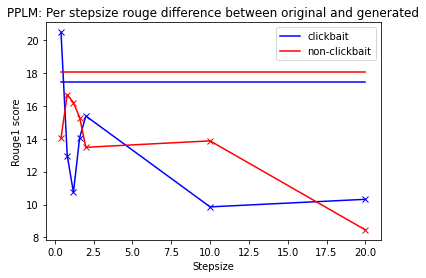

In [129]:
# for k, v in array_rouge_values_all_hyperparams['original_clickbait'].items():
color_plot = {
    'clickbait' : 'blue',
    'non-clickbait' : 'red'
}
k='clickbait'
plt.plot(stepsize_array, array_rouge_values_all_hyperparams['original_clickbait']['rouge1'], '-', 
            label=k, color = color_plot[k])
plt.plot(stepsize_array, array_rouge_values_all_hyperparams['generated_clickbait']['rouge1'], 'x-', 
            color = color_plot[k])
k='non-clickbait'
plt.plot(stepsize_array, array_rouge_values_all_hyperparams['original_non_clickbait']['rouge1'], '-', 
            label=k, color = color_plot[k])
plt.plot(stepsize_array, array_rouge_values_all_hyperparams['generated_non_clickbait']['rouge1'], 'x-', 
            color = color_plot[k])

title = 'PPLM: Per stepsize rouge difference between original and generated'
plt.title(title,wrap=True)
plt.xlabel('Stepsize')
plt.ylabel('Rouge1 score')
plt.legend()
plt.savefig('pplm/' + title + '.png')
plt.show()

## FUDGE

In [31]:
def get_classifier_results_fudge(original_dataset = None, 
                            fudge_dataset = None,
                            subset=100):

    fudge_results = {
        'id' : [],
        'original_title_clickbait_score' : [],
        'clickbait_title_clickbait_score' : [],
        'truthClass' : [],
    }
    for chosen_index in range(subset):

        if(chosen_index % 10 == 0):
            print(chosen_index)


        fudge_results['id'].append(original_dataset['id'][chosen_index])

        chosen_column = 'clickbait_title'
        result = rate_title(input_text = {
                            'postText' : fudge_dataset.iloc[chosen_index][chosen_column], 
                            'truthClass' : original_dataset['truthClass'][chosen_index]
                        },
                    model=classifier_model.to('cuda'),
                    tokenizer=classifier_tokenizer,
                    device='cuda'
                    )
        fudge_results['clickbait_title_clickbait_score'].append(result['predicted_class'])

        chosen_column = 'original_title'
        result = rate_title(input_text = {
                            'postText' : fudge_dataset.iloc[chosen_index][chosen_column], 
                            'truthClass' : original_dataset['truthClass'][chosen_index]
                        },
                    model=classifier_model.to('cuda'),
                    tokenizer=classifier_tokenizer,
                    device='cuda'
                    )
        fudge_results['original_title_clickbait_score'].append(result['predicted_class'])

        fudge_results['truthClass'].append(original_dataset['truthClass'][chosen_index])

    for key in fudge_results.keys():
        fudge_dataset[key] = pd.Series(fudge_results[key])

    return fudge_dataset


In [32]:
!ls fudge

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
df_clickbait_test_lambda_0.0_subset_25
df_clickbait_test_lambda_100.0_subset_25
df_clickbait_test_lambda_10.0_subset_25
df_clickbait_test_lambda_1.0_subset_25
df_clickbait_test_lambda_200.0_subset_25
df_clickbait_test_lambda_20.0_subset_25
df_clickbait_test_lambda_30.0_subset_25
df_clickbait_test_lambda_40.0_subset_25
df_clickbait_test_lambda_50.0_subset_25
df_clickbait_test_lambda_5.0_subset_25
df_clickbait_test_lambda_60.0_subset_25
df_clickbait_test_lambda_70.0_subset_25
df_clickbait_test_lambda_80.0_subset_25
df_clickbait_test_lambda_90.0_subset_25
fudge_df_clickbait_test.csv
fudge_df_clickbait_train.csv
fudge_df_clickbait_valid.csv
fudge_test.png


In [34]:
import pandas as pd
import torch
df_fudge_test = pd.read_csv('fudge/df_clickbait_test_lambda_100.0_subset_25') 
df_fudge_test = get_classifier_results_fudge(original_dataset = webis_total['test'],
                                            fudge_dataset=df_fudge_test,
                                            subset=25)
df_fudge_test.head()

0
10
20


,original_title,clickbait_title,article_content,id,original_title_clickbait_score,clickbait_title_clickbait_score,truthClass
0,Johnny Manziel Says Top Pick in Draft Myles Ga...,FormerTexans Mistake: Johnny Maneeeeece's rea...,"[""Johnny Manziel approves of the Cleveland Bro...",858426904239497216,0.012937,0.881095,0
1,Fabio: California Is a 'Mess' Because of Liber...,"Fabio, one of the best signed male modelling ...","['Fabio, the Italian-born male model who has a...",858416350540201984,0.013666,0.013017,0
2,"Jimmy Butler wants to return, hopes Bulls keep...",Jimmy Butler and 'coaching marvel Distinctly ...,"[""CHICAGO -- All-Star swingman Jimmy Butler kn...",858364015260704768,0.012977,0.013245,1
3,Mitchell Trubisky booed at United Center durin...,"draft, day, picks, predictions....",['CHICAGO -- New Bears quarterback Mitchell Tr...,858335817693102080,0.012913,0.903758,0
4,It's Not Enough to Give Employees Flexible Wor...,"When she took maternity leave, she was shocke...","['Six months after her baby was born, Amanda S...",858326196282679296,0.013884,0.903231,0


In [35]:
baseline_summaries_pplm = []

for item in webis_total["test"][:25]['targetParagraphs']:
    baseline_summaries_pplm.append(three_sentence_summary(eval(item)))

baseline_summaries_pplm[0]

df_fudge_test['baseline'] = baseline_summaries_pplm

{'rouge1': 7.39, 'rouge2': 1.78, 'rougeL': 6.26, 'rougeLsum': 6.89}
{'rouge1': 13.34, 'rouge2': 5.13, 'rougeL': 11.14, 'rougeLsum': 11.77}


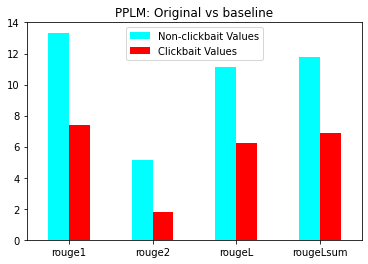

In [32]:
results_original = get_scores(series_title = df_fudge_test['original_title'],
               series_index = df_fudge_test['truthClass'],
               baseline_title = df_fudge_test['baseline'],
               set_bar_title = 'pplm/' + 'PPLM: Original vs baseline')

{'rouge1': 6.62, 'rouge2': 0.76, 'rougeL': 5.26, 'rougeLsum': 5.93}
{'rouge1': 8.86, 'rouge2': 0.97, 'rougeL': 6.61, 'rougeLsum': 6.99}


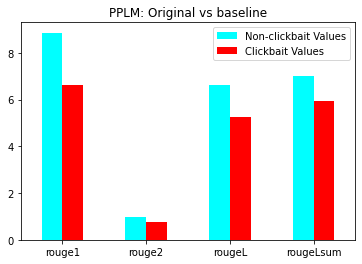

In [33]:
results_generated = get_scores(series_title = df_fudge_test['clickbait_title'],
               series_index = df_fudge_test['truthClass'],
               baseline_title = df_fudge_test['baseline'],
               set_bar_title = 'pplm/' + 'PPLM: Original vs baseline')

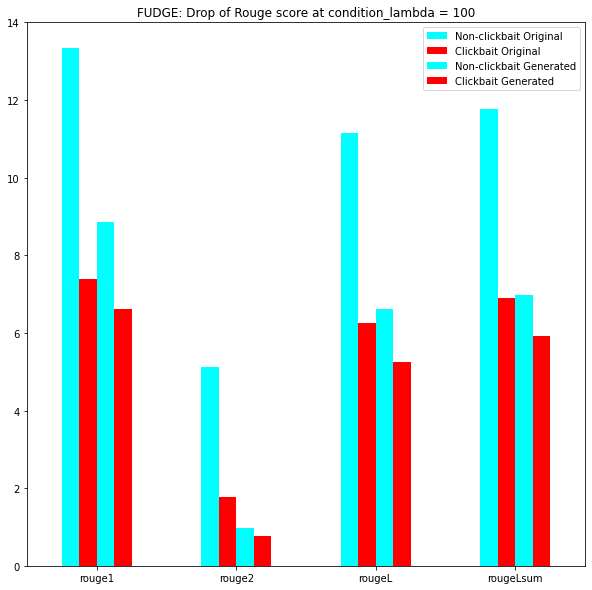

In [35]:
index = list(results_original['non_clickbait_rouge_dict'].keys())

df = pd.DataFrame({'Non-clickbait Original': results_original['non_clickbait_rouge_dict'].values(),
                    'Clickbait Original': results_original['clickbait_rouge_dict'].values(),
                    'Non-clickbait Generated': results_generated['non_clickbait_rouge_dict'].values(),
                    'Clickbait Generated': results_generated['clickbait_rouge_dict'].values()}, index=index)


ax = df.plot.bar(rot=0, color={
                    'Non-clickbait Original': "cyan",
                    'Clickbait Original': "red",
                    'Non-clickbait Generated': "cyan",
                    'Clickbait Generated': "red"},
                    figsize=(10,10))

set_bar_title = 'FUDGE: Drop of Rouge score at condition_lambda = 100'                  
ax.set_title(set_bar_title,wrap=True)
# plt.save_fig(set_bar_title + '.png')
# fig = df.plot()
fig = ax.get_figure()
fig.savefig('fudge/' + set_bar_title + '.png')

Lambda coeff is 0.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 12.82, 'rouge2': 3.12, 'rougeL': 7.9, 'rougeLsum': 8.38}
{'rouge1': 15.36, 'rouge2': 3.95, 'rougeL': 10.31, 'rougeLsum': 12.48}
Lambda coeff is 1.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 17.22, 'rouge2': 2.35, 'rougeL': 10.77, 'rougeLsum': 11.16}
{'rouge1': 17.41, 'rouge2': 5.63, 'rougeL': 11.04, 'rougeLsum': 14.35}
Lambda coeff is 5.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 17.48, 'rouge2': 4.34, 'rougeL': 11.83, 'rougeLsum': 14.31}
{'rouge1': 16.44, 'rouge2': 5.21, 'rougeL': 11.6, 'rougeLsum': 13.37}
Lambda coeff is 10.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'r

/home/dsvilarkovic/miniconda3/envs/nlp_lss/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 6.76, 'rouge2': 0.59, 'rougeL': 4.89, 'rougeLsum': 5.49}
{'rouge1': 9.49, 'rouge2': 1.18, 'rougeL': 6.96, 'rougeLsum': 7.89}
Lambda coeff is 60.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 10.83, 'rouge2': 1.42, 'rougeL': 6.93, 'rougeLsum': 8.24}
{'rouge1': 10.36, 'rouge2': 1.31, 'rougeL': 6.89, 'rougeLsum': 8.81}
Lambda coeff is 70.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.11, 'rouge2': 5.2, 'rougeL': 11.09, 'rougeLsum': 11.62}
{'rouge1': 8.87, 'rouge2': 0.77, 'rougeL': 6.25, 'rougeLsum': 7.67}
{'rouge1': 11.0, 'rouge2': 1.56, 'rougeL': 8.74, 'rougeLsum': 9.33}
Lambda coeff is 80.0
0
10
20
{'rouge1': 7.17, 'rouge2': 1.76, 'rougeL': 6.39, 'rougeLsum': 6.89}
{'rouge1': 13.1

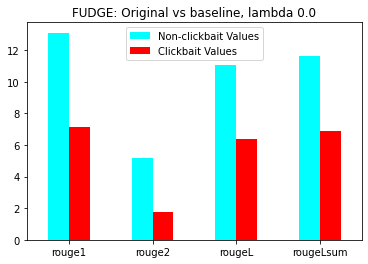

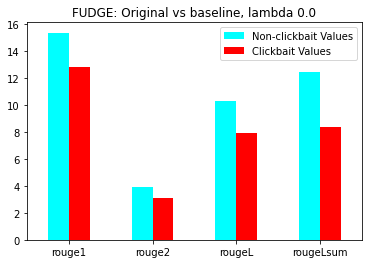

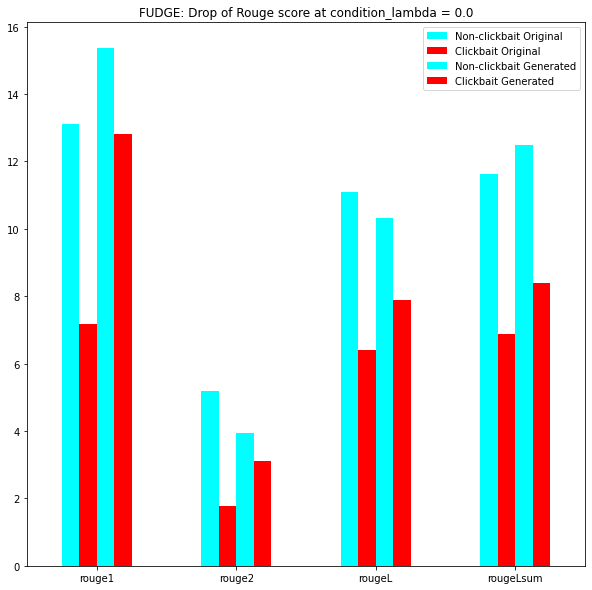

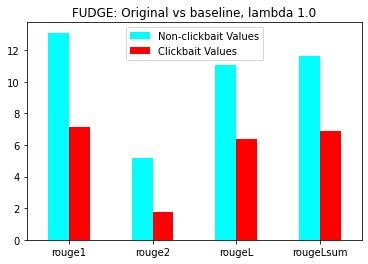

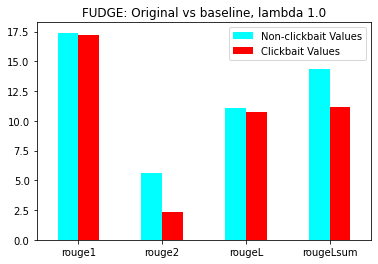

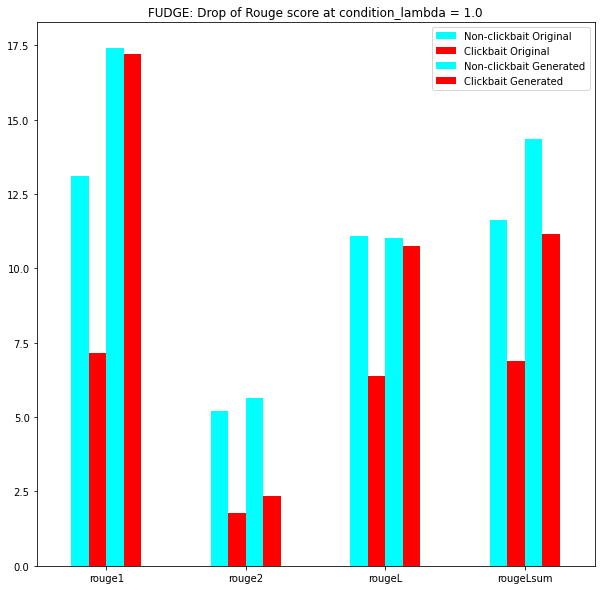

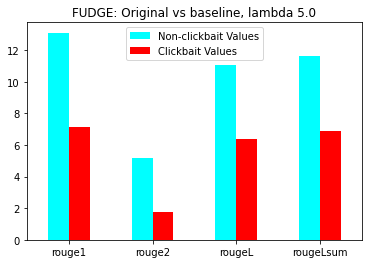

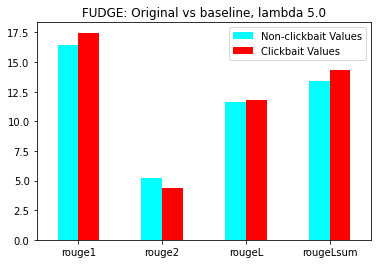

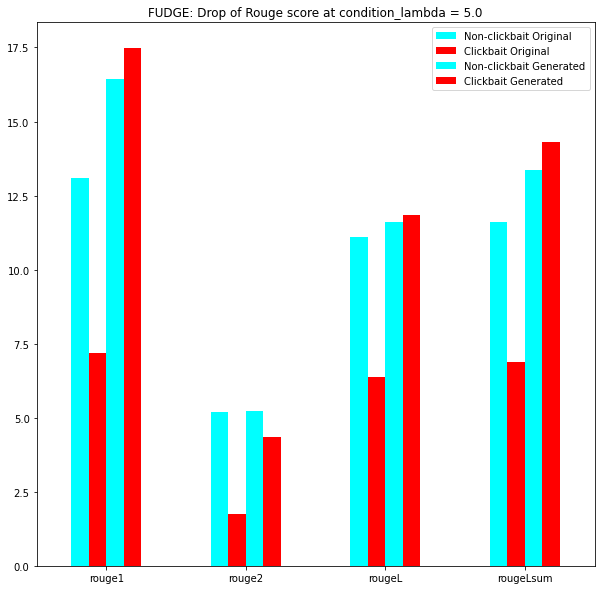

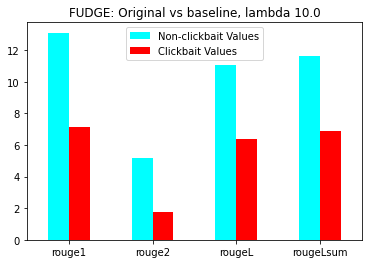

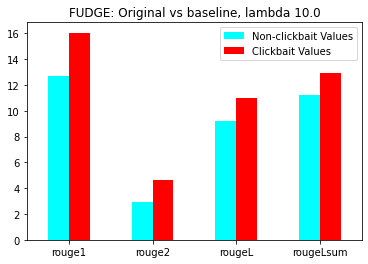

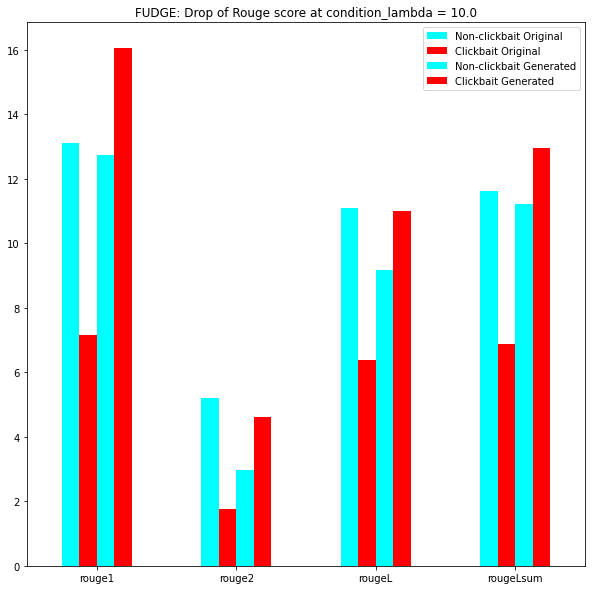

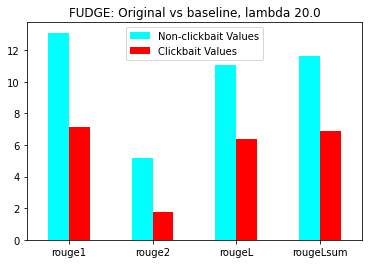

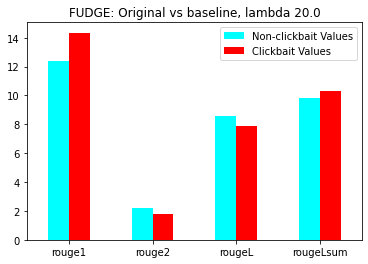

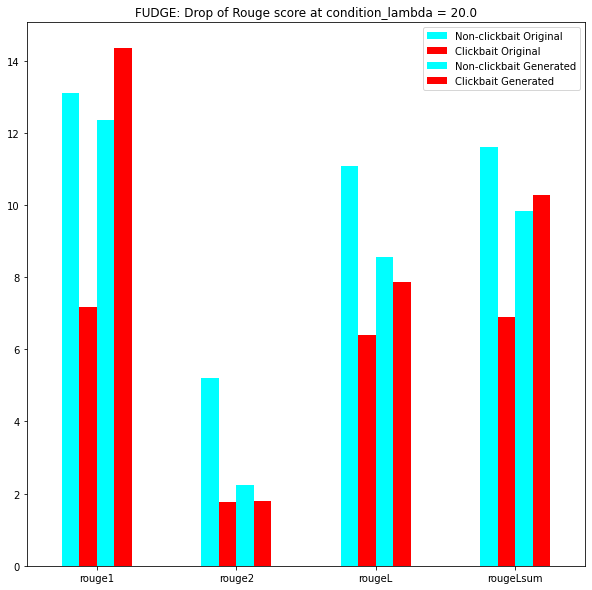

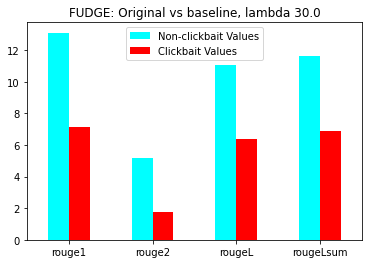

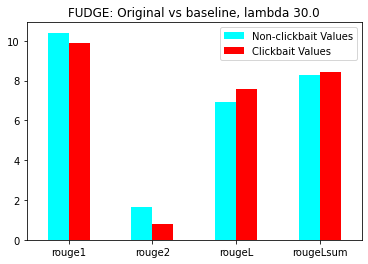

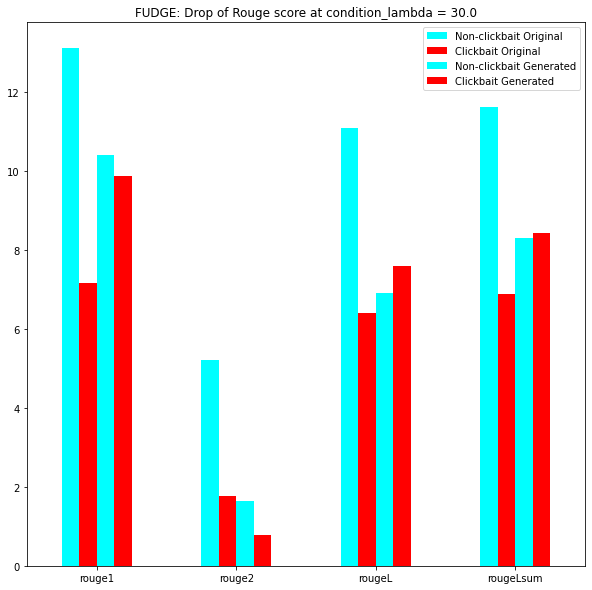

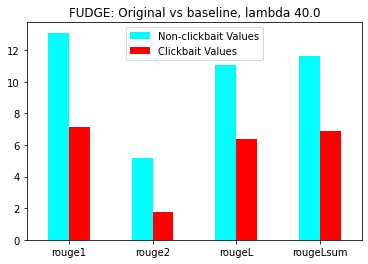

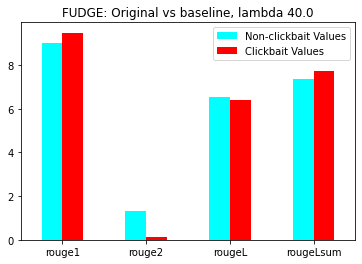

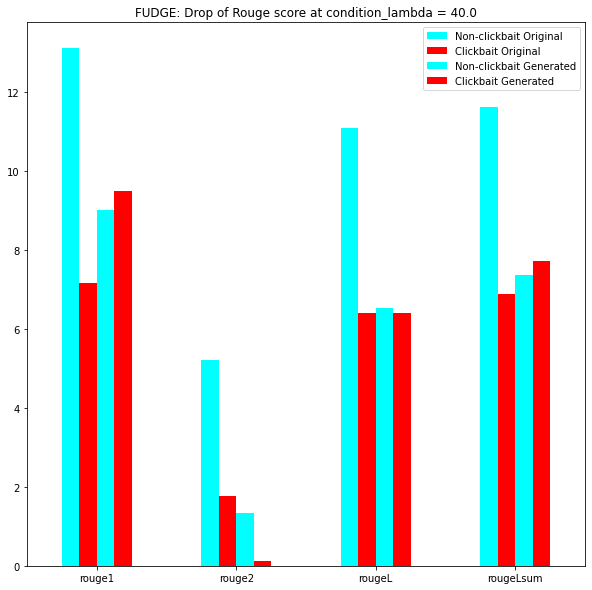

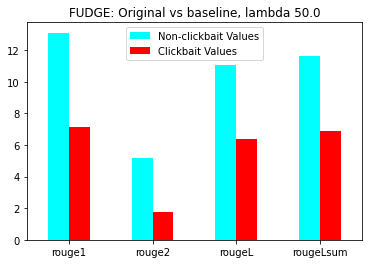

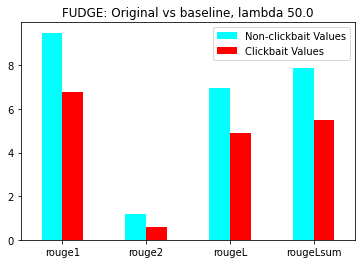

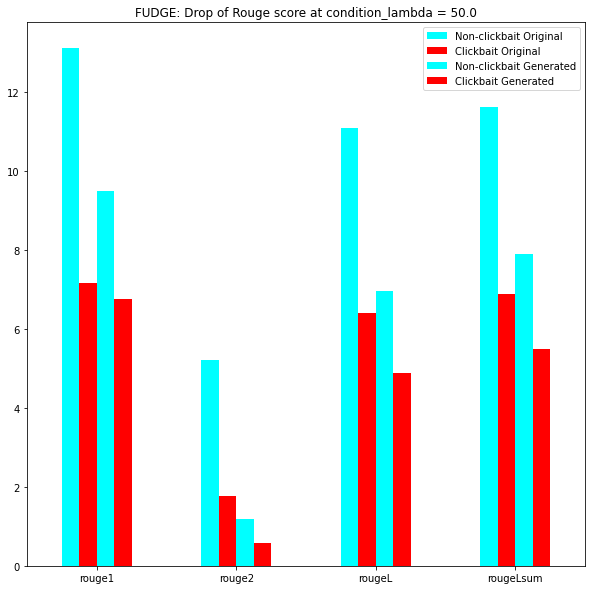

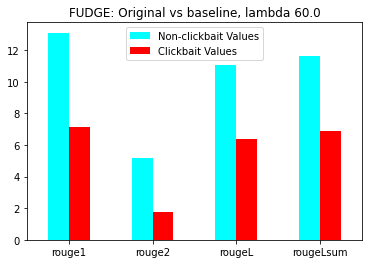

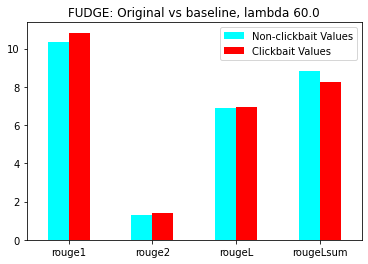

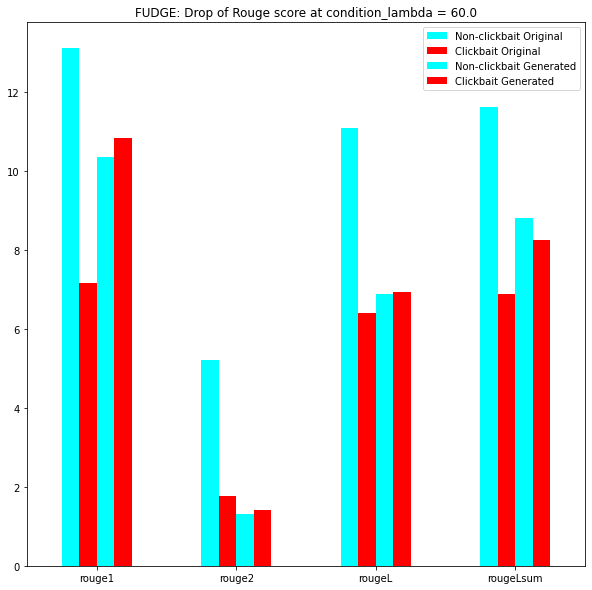

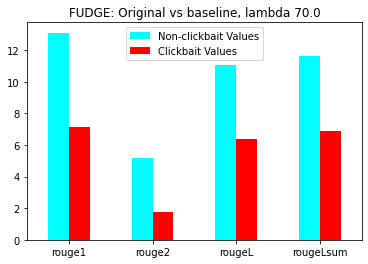

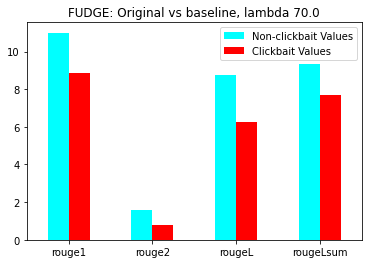

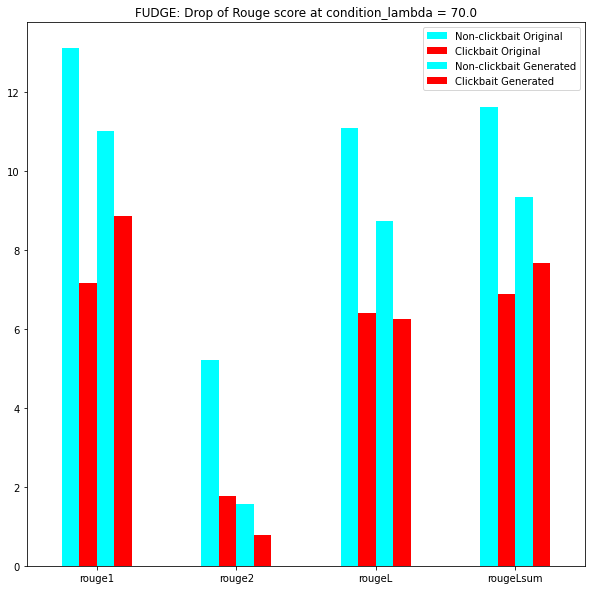

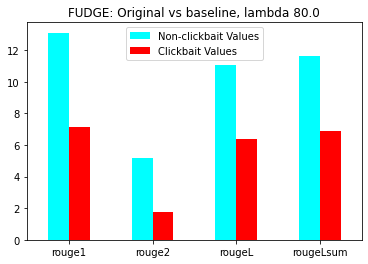

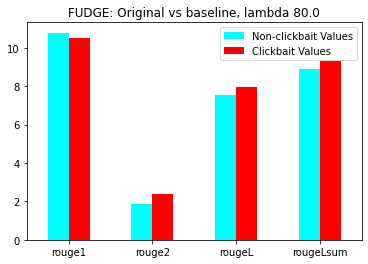

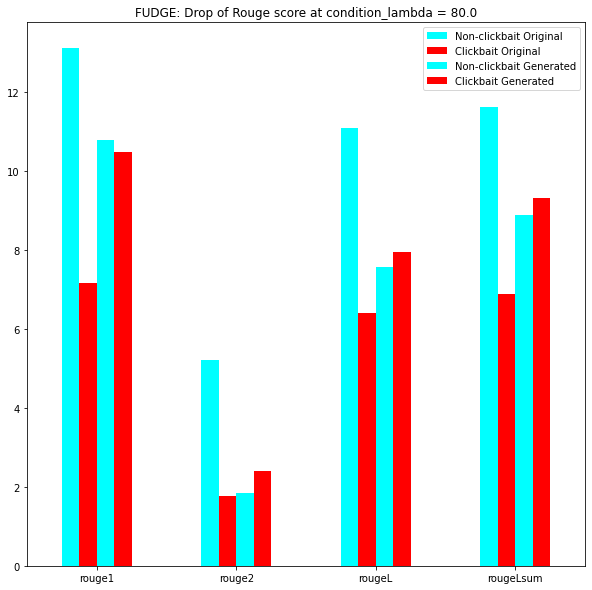

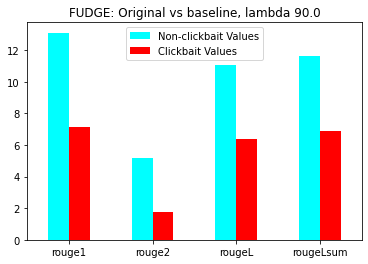

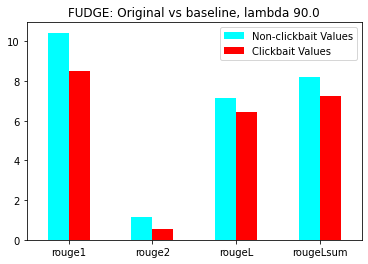

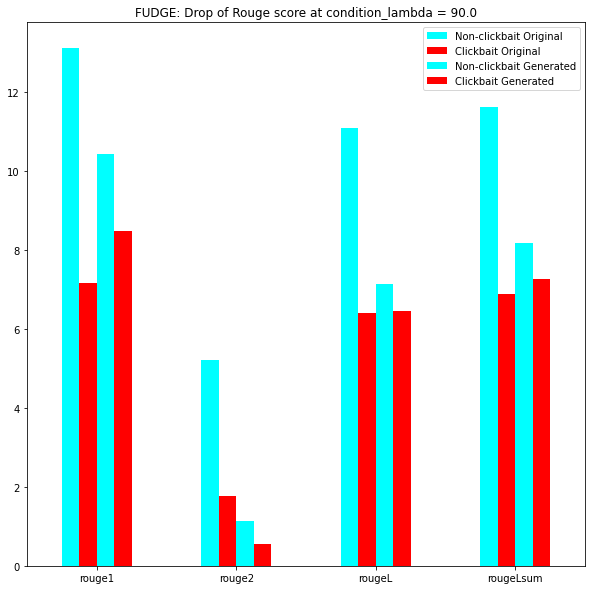

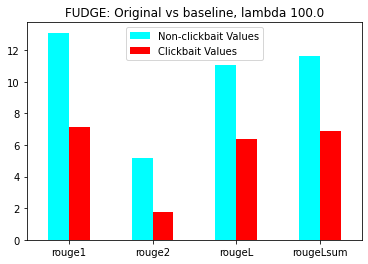

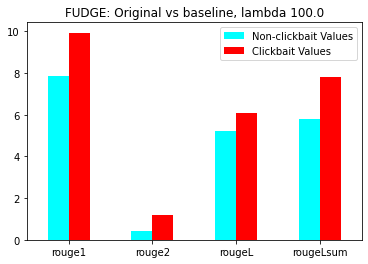

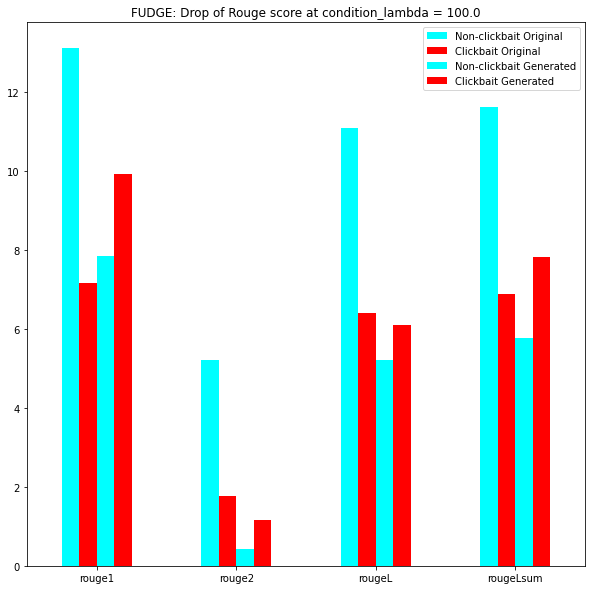

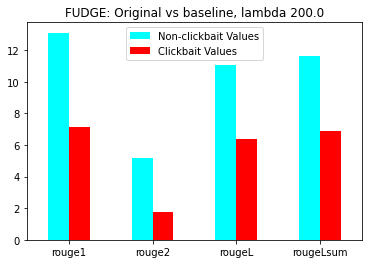

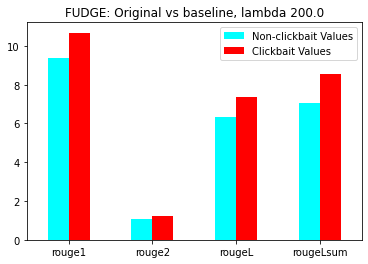

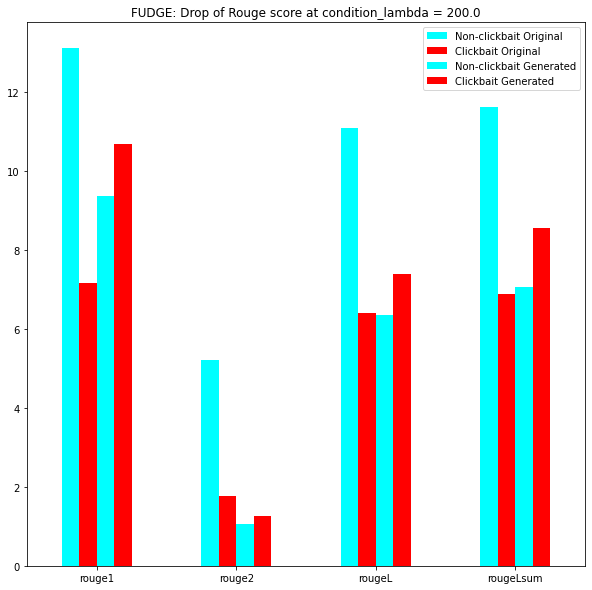

In [121]:
def add_rouge_items(dictionary_to_add_to, dictionary_items):
    for k,v in dictionary_items.items():
        dictionary_to_add_to[k].append(dictionary_items[k])

    return dictionary_to_add_to
# array_rouge_values_all_hyperparams['original_clickbait']


# lambda_array = [0.0, 1.0,5.0, 10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,200.0]
lambda_array = [0.0, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0,
                     70.0, 80.0, 90.0, 100.0, 120.0, 130.0, 140.0, 150.0, 200.0]

keys_array = ['original_clickbait', 'original_non_clickbait', 'generated_clickbait', 'generated_non_clickbait']

array_rouge_values_all_hyperparams = {key : {
        'rouge1': [],
        'rouge2': [],
        'rougeL': [],
        'rougeLsum' : []
    }for key in keys_array}


for lambda_coeff in lambda_array:
    print(f'Lambda coeff is {lambda_coeff}')
    df_fudge_test = pd.read_csv(f'fudge/df_clickbait_test_lambda_{lambda_coeff}_subset_25') 
    df_fudge_test = get_classifier_results_fudge(original_dataset = webis_total['test'],
                                                fudge_dataset=df_fudge_test,
                                                subset=25)

    df_fudge_test['baseline'] = baseline_summaries_pplm
    results_original = get_scores(series_title = df_fudge_test['original_title'],
                series_index = df_fudge_test['truthClass'],
                baseline_title = df_fudge_test['baseline'],
                set_bar_title = 'fudge/' + f'FUDGE: Original vs baseline, lambda {lambda_coeff}')

    results_generated = get_scores(series_title = df_fudge_test['clickbait_title'],
                series_index = df_fudge_test['truthClass'],
                baseline_title = df_fudge_test['baseline'],
                set_bar_title = 'fudge/' + f'FUDGE: Original vs baseline, lambda {lambda_coeff}')

    add_rouge_items(array_rouge_values_all_hyperparams['original_clickbait'], results_original['clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['original_non_clickbait'], results_original['non_clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['generated_clickbait'], results_generated['clickbait_rouge_dict'])
    add_rouge_items(array_rouge_values_all_hyperparams['generated_non_clickbait'], results_generated['non_clickbait_rouge_dict'])

    index = list(results_original['non_clickbait_rouge_dict'].keys())

    df = pd.DataFrame({'Non-clickbait Original': results_original['non_clickbait_rouge_dict'].values(),
                        'Clickbait Original': results_original['clickbait_rouge_dict'].values(),
                        'Non-clickbait Generated': results_generated['non_clickbait_rouge_dict'].values(),
                        'Clickbait Generated': results_generated['clickbait_rouge_dict'].values()}, index=index)


    ax = df.plot.bar(rot=0, color={
                        'Non-clickbait Original': "cyan",
                        'Clickbait Original': "red",
                        'Non-clickbait Generated': "cyan",
                        'Clickbait Generated': "red"},
                        figsize=(10,10))

    set_bar_title = f'FUDGE: Drop of Rouge score at condition_lambda = {lambda_coeff}'                  
    ax.set_title(set_bar_title,wrap=True)
    # plt.save_fig(set_bar_title + '.png')
    # fig = df.plot()
    fig = ax.get_figure()
    fig.savefig('fudge/' + set_bar_title + '.png')


##### Original has always the same value, as expected

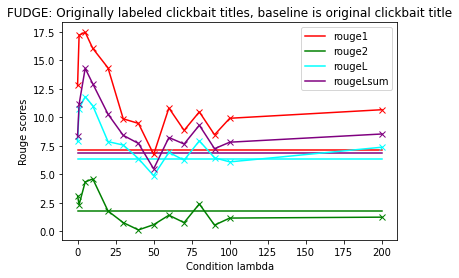

In [122]:
import matplotlib.pyplot as plt

color_plot = {
    'rouge1' : 'red',
    'rouge2' : 'green', 
    'rougeL' : 'cyan', 
    'rougeLsum' : 'purple'
}
for k, v in array_rouge_values_all_hyperparams['original_clickbait'].items():
    plt.plot(lambda_array, v, '-', label=k, color = color_plot[k])

for k, v in array_rouge_values_all_hyperparams['generated_clickbait'].items():
    plt.plot(lambda_array, v, 'x-', color = color_plot[k])

title = 'FUDGE: Originally labeled clickbait titles, baseline is original clickbait title'
plt.title(title,wrap=True)
plt.xlabel('Condition lambda')
plt.ylabel('Rouge scores')
plt.legend()
plt.savefig('fudge/' + title + '.png')
plt.show()


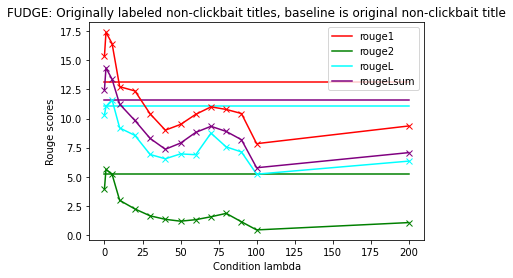

In [123]:
import matplotlib.pyplot as plt

color_plot = {
    'rouge1' : 'red',
    'rouge2' : 'green', 
    'rougeL' : 'cyan', 
    'rougeLsum' : 'purple'
}
for k, v in array_rouge_values_all_hyperparams['original_non_clickbait'].items():
    plt.plot(lambda_array, v, '-', label=k, color = color_plot[k])

for k, v in array_rouge_values_all_hyperparams['generated_non_clickbait'].items():
    plt.plot(lambda_array, v, 'x-', color = color_plot[k])

title = 'FUDGE: Originally labeled non-clickbait titles, baseline is original non-clickbait title'
plt.title(title,wrap=True)
plt.xlabel('Condition lambda')
plt.ylabel('Rouge scores')
plt.legend()
plt.savefig('fudge/' + title + '.png')
plt.show()

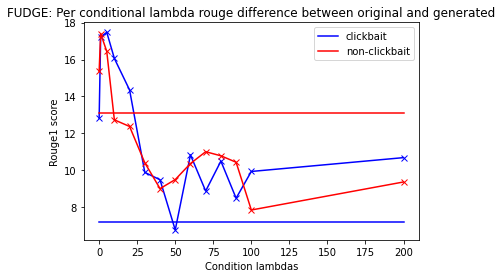

In [124]:
# for k, v in array_rouge_values_all_hyperparams['original_clickbait'].items():
color_plot = {
    'clickbait' : 'blue',
    'non-clickbait' : 'red'
}
k='clickbait'
plt.plot(lambda_array, array_rouge_values_all_hyperparams['original_clickbait']['rouge1'], '-', 
            label=k, color = color_plot[k])
plt.plot(lambda_array, array_rouge_values_all_hyperparams['generated_clickbait']['rouge1'], 'x-', 
            color = color_plot[k])
k='non-clickbait'
plt.plot(lambda_array, array_rouge_values_all_hyperparams['original_non_clickbait']['rouge1'], '-', 
            label=k, color = color_plot[k])
plt.plot(lambda_array, array_rouge_values_all_hyperparams['generated_non_clickbait']['rouge1'], 'x-', 
            color = color_plot[k])

title = 'FUDGE: Per conditional lambda rouge difference between original and generated'
plt.title(title)
plt.xlabel('Condition lambdas')
plt.ylabel('Rouge1 score')
plt.legend()
plt.savefig('fudge/' + title + '.png')
plt.show()

In [84]:
array_rouge_values_all_hyperparams['generated_clickbait'].keys()

dict_keys(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

### Rouge: Generated vs baseline title, separately for non-clickbait vs clickbait